In [2]:
from crypt import methods

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import plot_analysis_result as plot
import importlib
importlib.reload(plot)
input_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/after_Smooth/question_1'
output_folder = '/gladstone/engelhardt/lab/hvu/RNA_rates/solver_analysis/constant/after_Smooth/question_1'
os.makedirs(output_folder, exist_ok=True)
import importlib
importlib.reload(plot)
result_df = plot.read_all_result_files(input_folder, methods=['simpleSmooth'])

/tmp/ipykernel_3391981/3894103106.py:1: DeprecationWarning: 'crypt' is deprecated and slated for removal in Python 3.13
  from crypt import methods


       N     G  time_traverse_gene  label_time  h_bin  seed  \
0  15000  15.0               150.0           5  0.001  9999   
1  15000  15.0               150.0           5  0.100  9999   
2  15000  15.0               150.0           5  0.500  9999   
3  15000  15.0               150.0           5  1.000  9999   
4  15000  15.0               150.0           5  2.000  9999   

                                           output_fn  wMSE_simpleSmooth  \
0  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...           0.010125   
1  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...           0.002725   
2  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...           0.001570   
3  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...           0.001506   
4  /gladstone/engelhardt/lab/hvu/RNA_rates/solver...           0.001418   

   wFC_simpleSmooth  
0          0.896937  
1          0.422206  
2          0.387492  
3          0.384552  
4          0.373119  


Heatmap of performance when we vary h_bin and true_h

(<Figure size 600x600 with 2 Axes>,
 <Axes: title={'center': 'wFC for simpleSolver'}, xlabel='true_h', ylabel='h_bin'>)

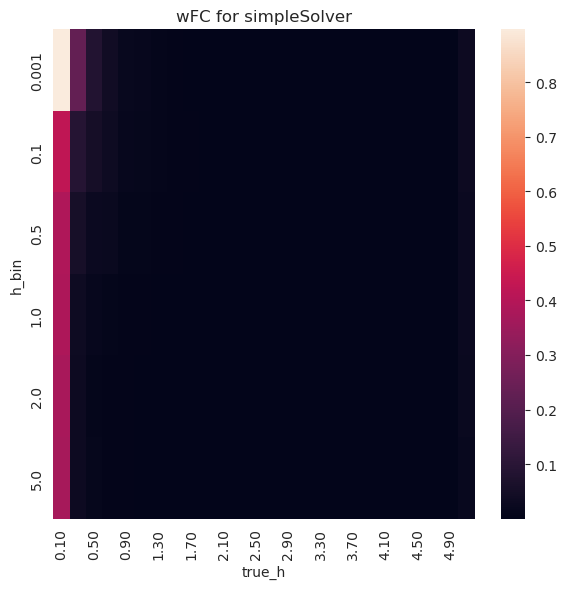

In [4]:
def question1_plot1(result_df, metric='wFC', save_fn = None, y_max=36):
    '''
    This is a heatmap with:
    - x-axis: different values of true_h
    - y-axis: different values of h_bin
    - heatmap: values of wMSE/wFC
    :param result_df:
    :param metric:
    :param save_fn:
    :param y_max:
    :return:
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    result_df['true_h'] = result_df['G']/result_df['time_traverse_gene']
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    sns.heatmap(data=result_df.pivot(index='h_bin', columns='true_h', values=f'{metric}_simpleSmooth'), ax=ax)
    ax.set_title(f'{metric} for simpleSolver')
    x_labels = ax.get_xticklabels()
    x_labels = [float(label.get_text()) for label in x_labels]
    x_labels = [f'{x:.2f}' for x in x_labels]
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('true_h')
    plt.tight_layout()
    if save_fn:
        plt.savefig(save_fn)
    return fig, ax

question1_plot1(result_df, metric='wFC', save_fn=os.path.join(output_folder, 'question1_plot1.png'))
